In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from IPython.display import Audio

In [103]:
def tfPlot(sig, fs=44100):
    """
    Function for getting a time/frequency domain plot.
    """
    N = len(sig)
    t = np.arange(N)/fs
    plt.figure(figsize=[17,5])
    plt.subplot(121)
    plt.title('Time Domain')
    plt.plot(t,sig)
    plt.grid()
    plt.xlabel('Time[sec]')
    plt.subplot(122)

    plt.semilogx(np.linspace(1,fs/2, int(N/2)), abs(np.fft.fft(sig))[0:int(N/2)])
    plt.xlabel('Freq[Hz]')
    plt.title('Spectrum')
    plt.grid()
    plt.show()



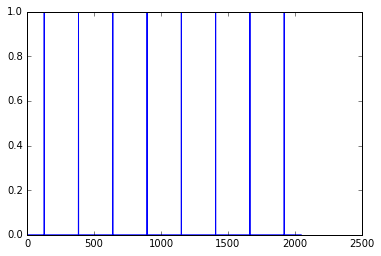

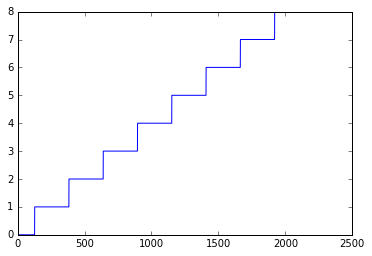

In [2]:
imp = signal.unit_impulse(256, 128)
n = np.arange(-128, 128)


train = np.tile(imp, 8)
plt.plot(train)
plt.show()

plt.plot(np.cumsum(train))
plt.show()


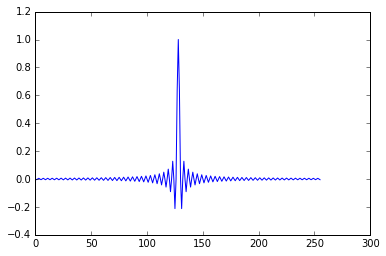

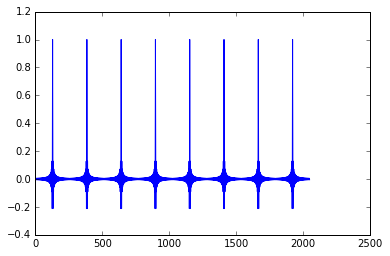

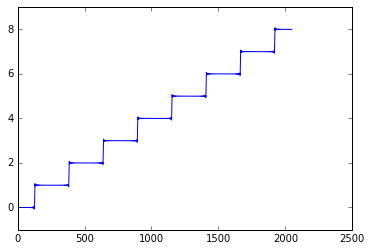

In [3]:
n = np.arange(-128, 128)
bli = np.sinc(n/2)
plt.plot(bli)
plt.show()

blit = np.tile(bli, 8)
plt.plot(blit)
plt.show()

plt.plot(np.cumsum(blit)/2)
plt.show()


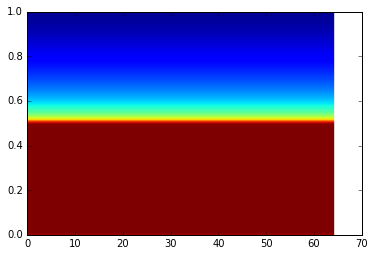

In [4]:
plt.specgram(bli)
plt.show()

# BLIT
A BLIT signal, $y(n)$ with $P$ as Period in Samples is given by:

$$ y(n) = (M/P) Sinc_M[(M/P)n] $$
where


$$ Sinc_M(x) = \frac{sin( \pi x)}{M sin(\pi x /M)}$$

$M$ = Number of Harmonics

Calculated via
$$ M = 2\cdot floor(P/2)+1 $$

## Issues:
- Not working for integer frequencies for some reason. For the moment, this is 'fixed' by subtracting a small offset to $P$ in tis case. 


In [67]:
def sincM(x, M):
    return np.sin(np.pi*x)/(M*np.sin((np.pi*x)/M))
def sampledSinc(n,M,P):
    if M==P:
        P-=0.001 #Hack to ensure M!=P.
    return (M/P)*sincM((M/P)*n, M)

In [68]:
T = 0.3 #sec
fs = 44100. #Hz
N = T*fs #num Samples
n = np.arange(N)+1 #sample Index
t = n/fs #time

In [69]:
freq = 100.000 #Hz
T1 = 1./freq #period in Seconds
Ts = 1./fs #sampling Period
P = T1/Ts # (1/freq)*fs
M = 2*np.floor(P/2.)+1 #Number of Harmonics
y = sampledSinc(n, M, P)

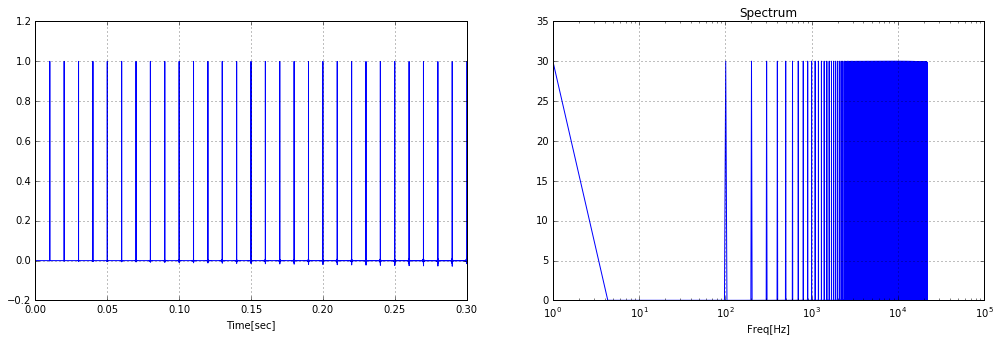

In [102]:
tfPlot(y, fs= fs)

In [72]:
Audio(data=y, rate=fs)

# Sawtooth

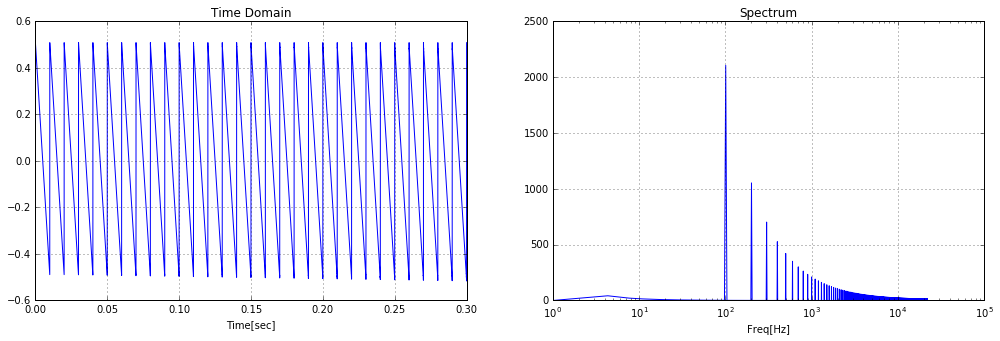

In [104]:
avg = np.average(y) #get DC component of BLIT
saw = np.cumsum(y-avg) # integrate after removing the dc component
saw -= np.average(saw) #remove DC component of result

tfPlot(saw, fs=fs)

In [77]:
Audio(data=saw, rate=fs)

In [117]:
def sawToothTable(N=4096, fs = 44100, M=None, phaseOffset = 0.25):
    """
    Generate a BLIT synthesized Sawtooth table.
    If M == None, 
    """
    n = np.arange(N)+1+N*phaseOffset
    
    T1 = N/fs# 1./freq #period in Seconds
    
    Ts = 1./fs #sampling Period
    P = T1/Ts # (1/freq)*fs
    if M== None:
        M = 2*np.floor(P/2.)+1 #Number of Harmonics
    y = sampledSinc(n, M, P) #sinc signal
    
    avg = np.average(y) #get DC component of BLIT
    saw = np.cumsum(y-avg) # integrate after removing the dc component
    saw -= np.average(saw) #remove DC component of result
    
    return saw

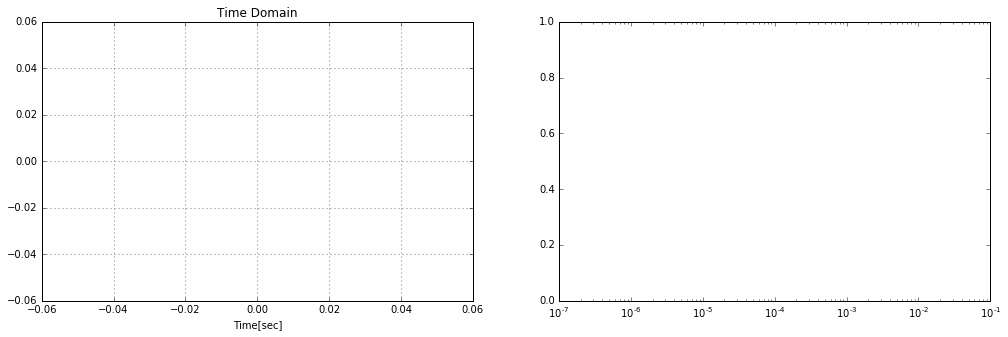

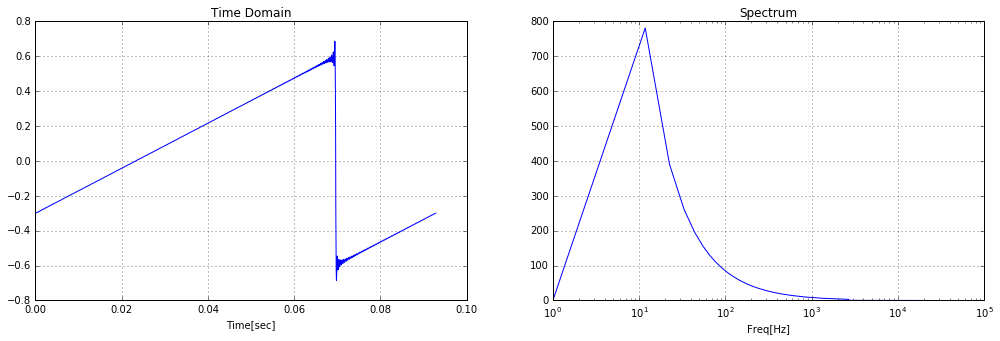

In [118]:
sawTable = sawToothTable(M=500)
tfPlot(sawTable, fs=fs)

## References
https://ccrma.stanford.edu/~stilti/papers/blit.pdf